# Inference: Adaptive MCMC

This example shows you how to perform Bayesian inference on a time series, using an adaptive MCMC method.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
    )

# Create a Bayesian log-likelihood (prior * likelihood)
log_likelihood = pints.BayesianLogLikelihood(prior, log_likelihood)

# Run a simple adaptive mcmc routine
x0 = real_parameters * 1.1
chain = pints.adaptive_covariance_mcmc(log_likelihood, x0)

Iteration 0 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 1.0
Iteration 50 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.078431372549
Iteration 100 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.039603960396
Iteration 150 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0264900662252
Iteration 200 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0398009950249
Iteration 250 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0398406374502
Iteration 300 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0365448504983
Iteration 350 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.031339031339
Iteration 400 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0274314214464
Iteration 450 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0243902439024
Iteration 500 of 6000
  In burn-in: False
  Adapting: False
  Accept

/home/michael/dev/pints/pints/_mcmc/_adaptive.py:75: RuntimeWarning: covariance is not positive-semidefinite.
  np.exp(loga) * sigma)


Iteration 1550 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.0186976144423
Iteration 1600 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.0318550905684
Iteration 1650 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.0502725620836
Iteration 1700 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.0681951793063
Iteration 1750 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.0776699029126
Iteration 1800 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.0782898389783
Iteration 1850 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.076715289033
Iteration 1900 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.074697527617
Iteration 1950 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.0738083034341
Iteration 2000 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.0729635182409
Iteration 2050 of 6000
  In burn-in: False
  Adaptin

Iteration 5950 of 6000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.203495210889


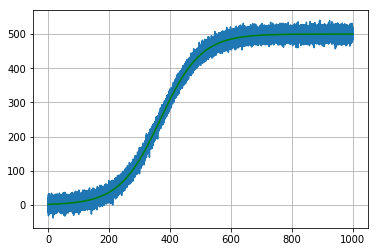

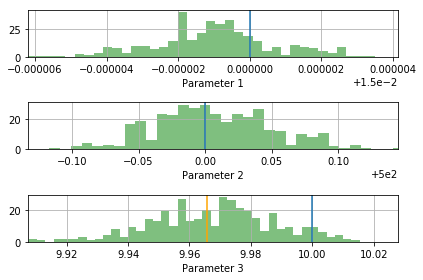

In [2]:
# Plot input
pl.figure()
pl.plot(times, values)
pl.plot(times, org_values, color='green')

# Plot output
pl.figure()
for i, real in enumerate(real_parameters):
    # Add subplot
    pl.subplot(len(real_parameters), 1, 1+i)
    pl.xlabel('Parameter ' + str(i + 1))
    # Show true value
    pl.axvline(real)
    # Show histogram of chain
    pl.hist(chain[:,i], label='p' + str(i + 1), bins=40, color='green',
        alpha=0.5)
    # Center plot around mean of chain
    mu = np.mean(chain[:,i])
    sigma = np.std(chain[:,i])
    pl.xlim(mu - 3 * sigma, mu + 3 * sigma)
pl.axvline(noise_sample_std, color='orange')
pl.tight_layout()
pl.show()